# Atlas Contruction

This tutorial helps the construction of an shape atlas using [deformetrica](www.deformetrica.org)


## Python Packages required:

- matplotlib

- numpy

- vtk

- pandas

- pandas

- seaborn

Deformetrica is an open-source library that is dedicated to shape statistics. It is the core of this project. It allows the construction of an atlas from a population of shapes. 


The atlas needs a series of inputs:

- The initial shape (vtk mesh) for each subject

- An initial template shape (vtk mesh)

- Options from 3 parameter xml files

  * model.xlm
  
  * data_set.xml
  
  * optimization_parameters.xml


The atlas output consists on:

- The mean of the population

- The moments of displacements from a subject to the mean

- The control points that define area of major variability amongst the population


The tutorial uses the data included in the subdirectory **data**.


In [ ]:
def which(program):
    ''' Search for a program on disk
    '''
    import os
    def is_exe(fpath):
        return os.path.isfile(fpath) and os.access(fpath, os.X_OK)

    fpath, fname = os.path.split(program)
    if fpath:
        if is_exe(program):
            return program
    else:
        for path in os.environ["PATH"].split(os.pathsep):
            exe_file = os.path.join(path, program)
            if is_exe(exe_file):
                return exe_file

    return None

deformetrica_location = which('deformetrica')
if deformetrica_location is None:
    print('deformetrica error: Please install the deformetrica library: www.deformetrica.org')
else: 
    print('Found deformetrica at this location: {}'.format(deformetrica_location))


## Load data

The data used in this tutorial are located in the 'data/atlasing' subfolder.

| File                        | Description         | 
| :-------------              |:--------------------|
| 1_r.vtk                     | Mesh file           |
| 2_r.vtk                     | Mesh file           |
| data_set.xlm                | data list           |
| model.xlm                   | deformation params  |
| optimization_parameters.xlm | optimization params |


- The **model.xml** file contains deformation parameters that are important:
  * <template> data-sigma: ratio between data attachment and regularity terms, usually **10**
  * <template> kernel-width: Order of magnitude of displacements for the template
  * <deformation-parameters> kernel-width: Order of magnitude for the subjects' displacements
  * <deformation-parameters> number-of-timepoints: number of steps in the diffeomorphic displacements
 

- The **optimization_parameters.xml** file contains the parameters that drive the minimization procedure:
  * max-iterations: Stop criterion for iterations, usually **~150**
  * number-of-threads: Number of threads to use, usually equal to the number of subjects
  
  

## Launch simulation


In [ ]:
import os

working_directory = os.path.join(os.getcwd(), 'data', 'atlasing')
script_filename = os.path.join(working_directory, 'deformetrica.sh')
os.system('. {}'.format(script_filename))


## Check results

The progress of the deformetrica minimization procedure are logged into a file: `deformetrica.log`. 

Another output is located in `convergence.txt`, and contains the enery terms through all iterations.

The file can be opened for inspection


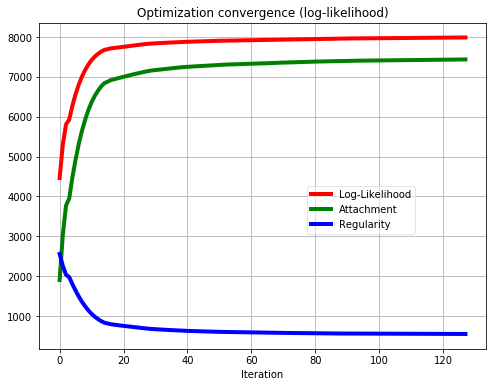

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib as mpl

working_directory = os.path.join(os.getcwd(), 'data', 'atlasing')

convergence_log = os.path.join(working_directory, 'convergence.txt')
df = pd.DataFrame(data=np.loadtxt(convergence_log, delimiter=' '), 
                  columns=['Log-Likelihood','Attachment','Regularity'])

plt.figure(figsize=(8,6))
plt.plot(df['Log-Likelihood'], 'r-', label='Log-Likelihood', linewidth=4.0)
plt.plot(df['Attachment'], 'g-', label='Attachment', linewidth=4.0)
plt.plot(df['Regularity'], 'b-', label='Regularity', linewidth=4.0)
plt.xlabel('Iteration')
plt.legend(bbox_to_anchor=(.6, .5), loc=2, borderaxespad=0., fancybox=True, framealpha=0.5)
plt.grid(which='major')
plt.title('Optimization convergence (log-likelihood)')
plt.savefig(os.path.join(working_directory, 'convergence.png'))


## Write convergence log

The convergence plot can be saved in 'csv' format to be open in excel for instance for future use

In [ ]:
df.to_csv(os.path.join(working_directory, 'convergence.csv'))

## Output files


The data that the atlas formation outputs is gathered in the current folder `data/atlasing`


| File                        | Description          | 
| :-------------              |:---------------------|
| Atlas_ControlPoints.txt     | Control points       |
| Atlas_Momentas.txt          | Momenta (for each s) |
| Atlas_DataSigma.txt         | unused               |
| Atlas_initial_template.vtk  | Final mean shape     |
| Atlas_initial_template_to_subject{X} | shootings to each subject |


## About this notebook

written by Nicolas Toussaint

Contact: <nicolas.a.toussaint@kcl.ac.uk>